# Testing Toy Dataset Generation

In [42]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../../")
device = "cuda" if torch.cuda.is_available() else "cpu"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from models.trigger_utils import generate_toy_dataset, generate_single_track

In [158]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.edge_index[:,~truth_mask],0], sample.x[sample.edge_index[:,~truth_mask],1], c='r', alpha=0.1)
    ax.plot(sample.x[sample.edge_index[:,truth_mask],0], sample.x[sample.edge_index[:,truth_mask],1], c='b', alpha=1, linewidth=2)
    plt.show()

In [34]:
dataset_config = {
    'num_events': 1,
    'num_tracks': 10,
    'num_layers': 10,
    'detector_width': 0.5,
    'ptcut': 0.0,
    'cut_policy': 1,
}

In [35]:
dataset = generate_toy_dataset(**dataset_config)

In [36]:
sample = dataset[0]

In [133]:
low_pt_tracks = []
i=0

while i < 10:
    track = generate_single_track(0, 0.0, 0.4, 10, 0.5)
    if len(track) and len(track.T[0]) > 5:
            low_pt_tracks.append(track)
            i+=1

while True:
    high_pt_track = generate_single_track(0, 0.8, 1.0, 10, 0.5)
    if len(high_pt_track) and len(high_pt_track.T[0]) > 5:
        break

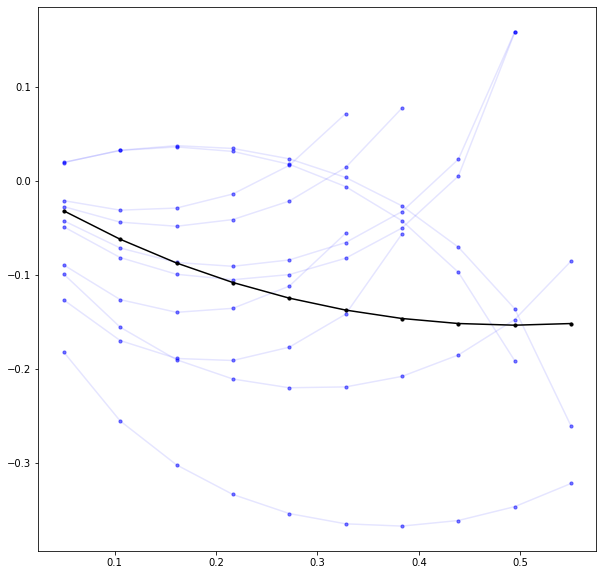

In [134]:
plt.figure(figsize=(10,10))
for track in low_pt_tracks:
    plt.plot(track[:,0], track[:,1], c="b", alpha=0.1)
    plt.scatter(track[:,0], track[:,1], s=10, c="b", alpha=0.5)
plt.plot(high_pt_track[:,0], high_pt_track[:,1], c='k')
plt.scatter(high_pt_track[:,0], high_pt_track[:,1], s=10, c='k')

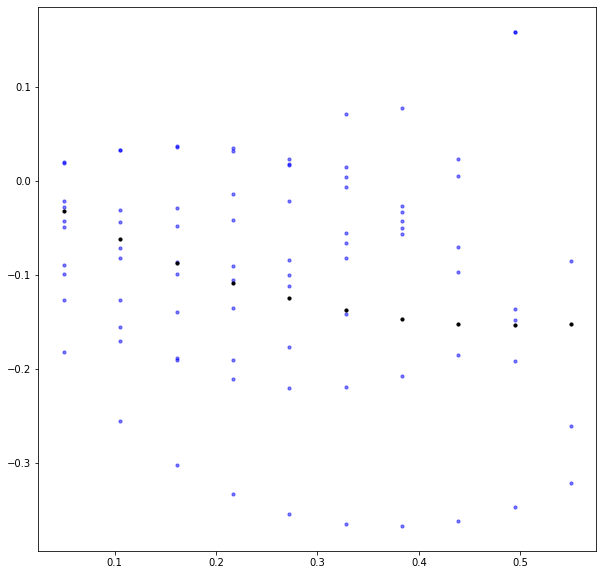

In [135]:
plt.figure(figsize=(10,10))
for track in low_pt_tracks:
    plt.scatter(track[:,0], track[:,1], s=10, c="b", alpha=0.5)
plt.scatter(high_pt_track[:,0], high_pt_track[:,1], s=10, c='k')

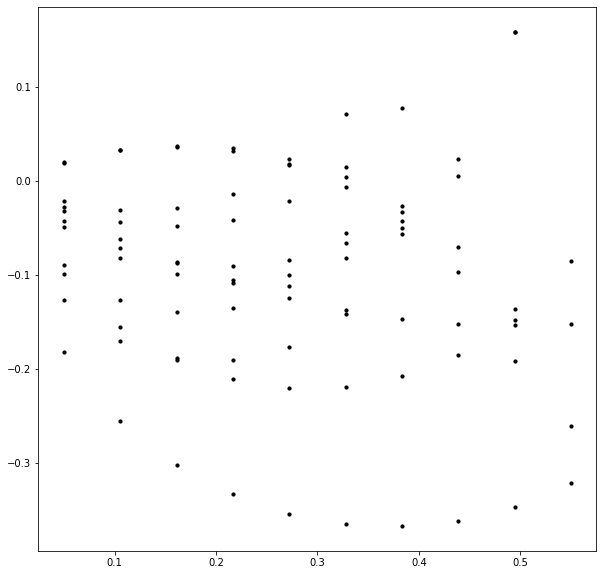

In [136]:
plt.figure(figsize=(10,10))
for track in low_pt_tracks:
    plt.scatter(track[:,0], track[:,1], s=10, c="k")
plt.scatter(high_pt_track[:,0], high_pt_track[:,1], s=10, c='k')

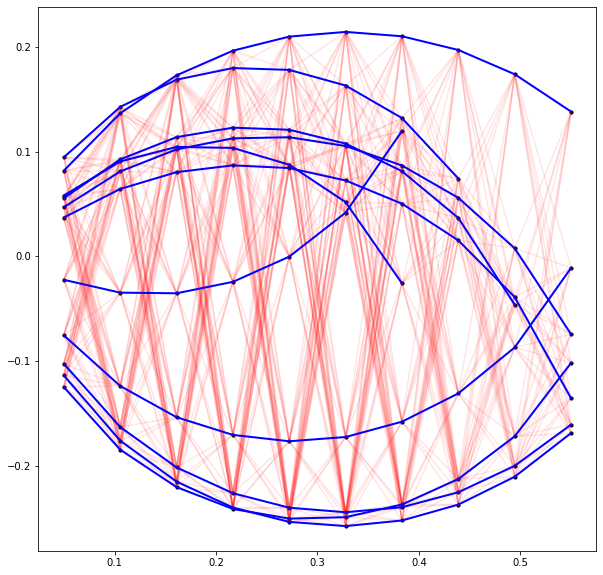

Purity:  tensor(0.0944)


In [41]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.edge_index[:,~truth_mask],0], sample.x[sample.edge_index[:,~truth_mask],1], c='r', alpha=0.1)
    ax.plot(sample.x[sample.edge_index[:,truth_mask],0], sample.x[sample.edge_index[:,truth_mask],1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)
print("Purity: ", sample.y.sum() / sample.y.shape[0])

## Build and Save Dataset

In [45]:
dataset_config = {
    'data_split': [2000, 100, 100],
    'num_events': 1,
    'num_tracks': 10,
    'num_layers': 10,
    'detector_width': 0.5,
    'ptcut': 0.0,
    'cut_policy': 1,
}

In [ ]:
dataset = generate_toy_dataset(**dataset_config)